# Filter design

In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
def plot_filter(x,y,order):
    plt.semilogx(x,y,label=f'order:{order}')
    plt.title('Filter frequency response')
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.margins(0,0.1)
    plt.legend()
    plt.grid()

In [2]:
def butter_lowpass(order,cutoff):
    n, d = signal.butter(order,cutoff, 'low', analog=True)
    w,h = signal.freqs(n,d)
    plot_filter(w,abs(h),order)

In [3]:
def butter_highpass(order,cutoff):
    n, d = signal.butter(order, cutoff, 'high', analog=True)
    w,h = signal.freqs(n,d)
    plot_filter(w,abs(h),order)

In [4]:
def butter_bandpass(order,low,high):
    n, d = signal.butter(order,(low,high), 'bandpass', analog=True)
    w,h = signal.freqs(n,d)
    plot_filter(w,abs(h),order)

In [5]:
def butter_bandstop(order,low,high):
    n, d = signal.butter(order,(low,high), 'bandstop', analog=True)
    w,h = signal.freqs(n,d)
    plot_filter(w,abs(h),order)

## Low pass filter

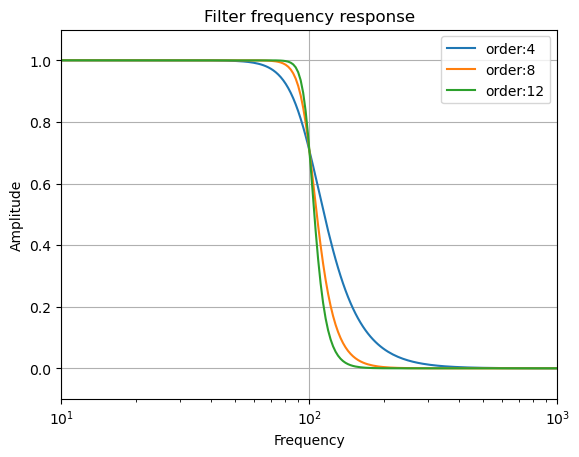

In [6]:
butter_lowpass(4, 100)
butter_lowpass(8, 100)
butter_lowpass(12, 100)

- Beyond 100Hz, the frequency response declines sharply similar to a sigmoid (hence, we can say that bandpass is from 0-100Hz).

## High pass filter: 0.1 Hz

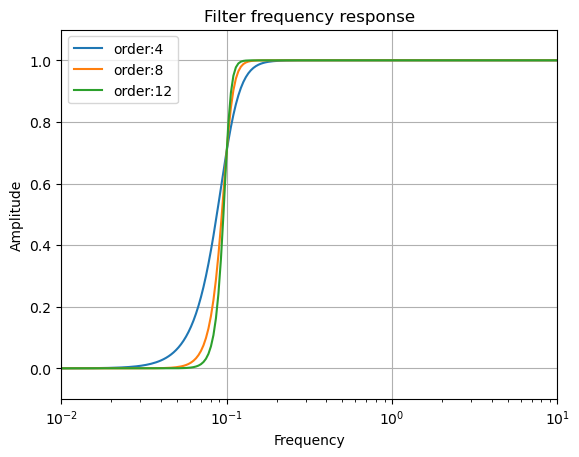

In [7]:
butter_highpass(4, 0.1)
butter_highpass(8, 0.1)
butter_highpass(12, 0.1)

- Beyond 0.1Hz, the frequency response has an amplitude approximated to 1 unit but below 0.1 Hz, the frequency response drops to 0 units similar to a signmoid.

## High pass filter: 1 Hz

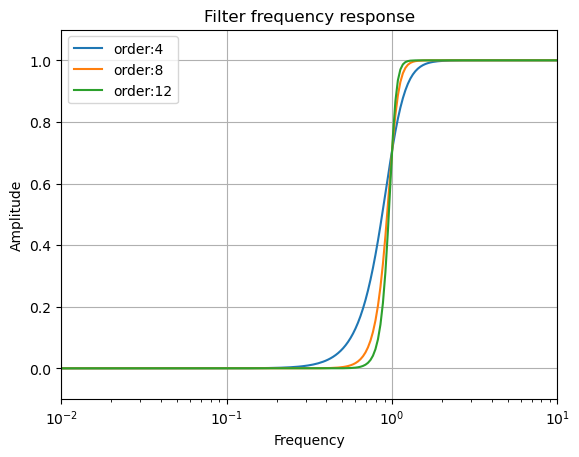

In [8]:
butter_highpass(4, 1)
butter_highpass(8, 1)
butter_highpass(12, 1)

- Beyond 1Hz, the frequency response has an amplitude approximated to 1 unit but below 0.1 Hz, the frequency response drops to 0 units similar to a signmoid.

## Band pass filter: 0.1-100 Hz

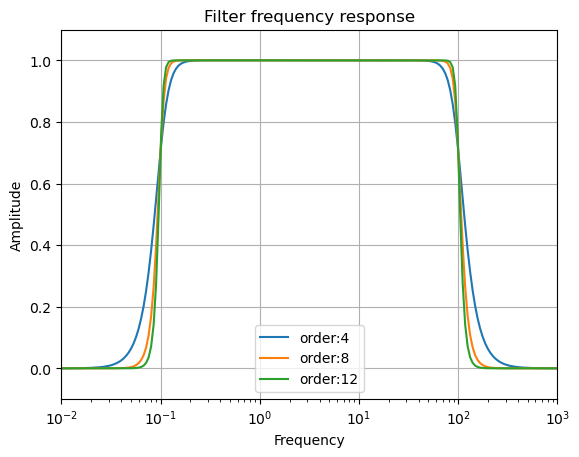

In [9]:
butter_bandpass(4, 0.1, 100)
butter_bandpass(8, 0.1, 100)
butter_bandpass(12, 0.1, 100)

- The frequency response is maximum from 0.1-100 Hz and close to 0 outside the range. Hence, the passband range is 0.1-100 Hz.

## Band pass filter: 1-100 Hz

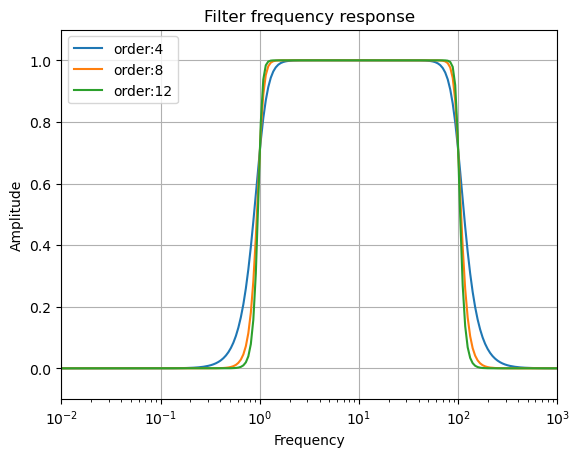

In [10]:
butter_bandpass(4, 1, 100)
butter_bandpass(8, 1, 100)
butter_bandpass(12, 1, 100)

- The frequency response is maximum from 1-100 Hz and close to 0 outside the range. Hence, the passband range is 1-100 Hz.

## Band stop filter: 45-55 Hz

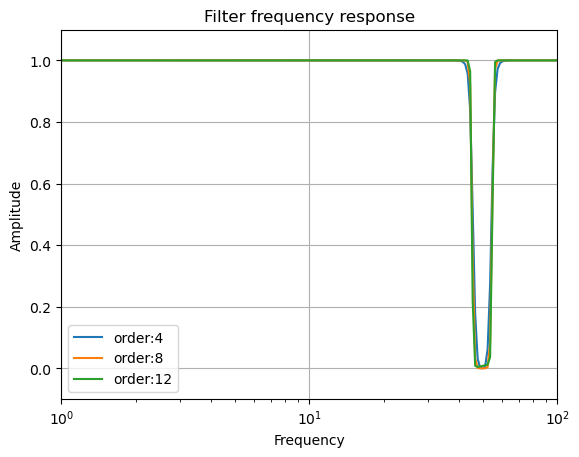

In [11]:
butter_bandstop(4, 45, 55)
butter_bandstop(8, 45, 55)
butter_bandstop(12, 45, 55)

- The frequency response is minimum in the range 45-55 Hz and maximum outside the range. Hence, passband range 0-45 Hz and 55-100 Hz.

- The roll-off rate of a filter refers to how fast the filter attenuates frequencies beyond the cutoff frequency. 
- As the order of the Butterworth filter increases, the roll-off rate also increases proportionally.
- A higher roll-off rate indicates a steeper decline in the filter response beyond the cutoff frequency. In other words, higher-order filters attenuate frequencies beyond the cutoff more quickly.
- Roll-off rate (dB/octave) = 20 * n, where n is the order of filter.

# Sampling frequency: 1000 Hz

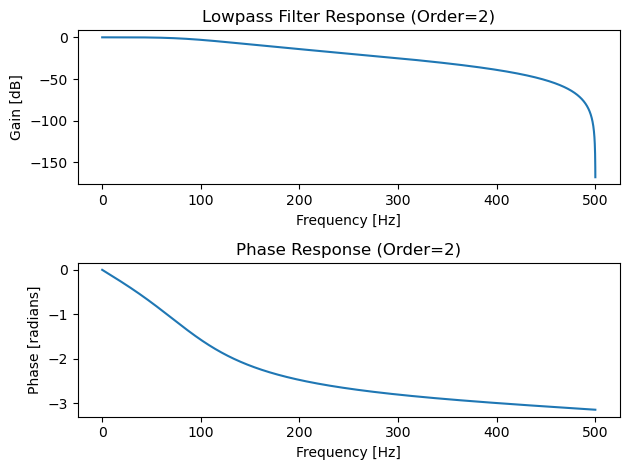

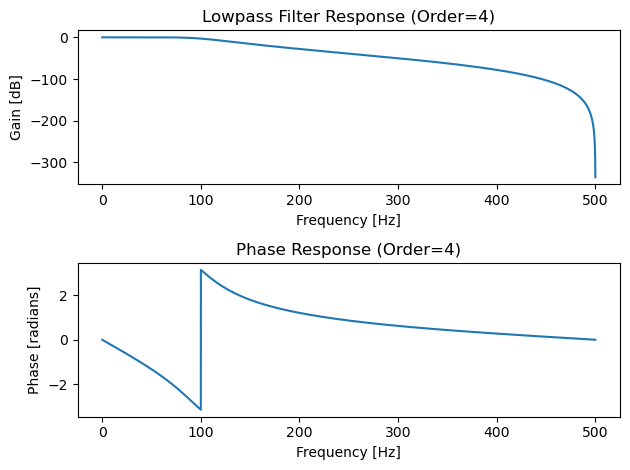

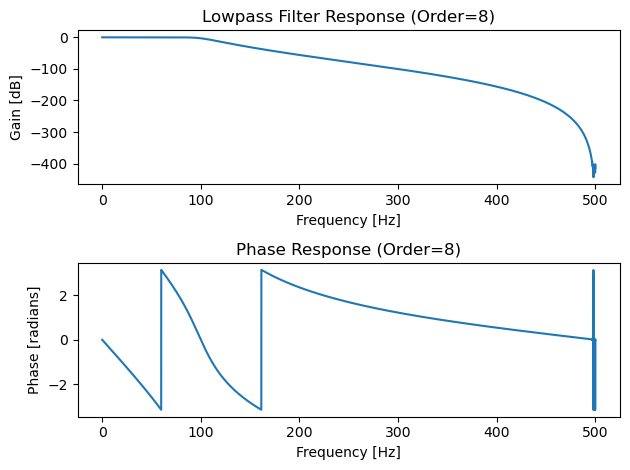

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def plot_filter_response(order, cutoff, filter_type, sampling_frequency):
    nyquist = 0.5 * sampling_frequency
    
    if filter_type == 'lowpass':
        b, a = signal.butter(order, cutoff/nyquist, btype='low', analog=False)
    elif filter_type == 'highpass':
        b, a = signal.butter(order, cutoff/nyquist, btype='high', analog=False)
    elif filter_type == 'bandpass':
        b, a = signal.butter(order, [cutoff[0]/nyquist, cutoff[1]/nyquist], btype='band', analog=False)
    elif filter_type == 'bandstop':
        b, a = signal.butter(order, [cutoff[0]/nyquist, cutoff[1]/nyquist], btype='bandstop', analog=False)
    else:
        raise ValueError("Invalid filter type")
    
    # Frequency response
    w, h = signal.freqz(b, a, worN=8000)
    
    # Plot passband/stopband ripple and stopband attenuation
    plt.subplot(2, 1, 1)
    plt.plot(0.5 * sampling_frequency * w / np.pi, 20 * np.log10(abs(h)))
    plt.title(f'{filter_type.capitalize()} Filter Response (Order={order})')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Gain [dB]')

    plt.subplot(2, 1, 2)
    plt.plot(0.5 * sampling_frequency * w / np.pi, np.angle(h))
    plt.title(f'Phase Response (Order={order})')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Phase [radians]')
    
    plt.tight_layout()
    plt.show()

# Example usage with different filter orders
sampling_frequency = 1000.0

# Lowpass filter: Cutoff = 100Hz
cutoff_lowpass = 100.0
for order in [2, 4, 8]:
    plot_filter_response(order, cutoff_lowpass, 'lowpass', sampling_frequency)

## Highpass filter, cutoff = 0.1 Hz

C:\Users\Akhil\AppData\Local\Temp\ipykernel_5776\114759088.py:24: RuntimeWarning: divide by zero encountered in log10
  plt.plot(0.5 * sampling_frequency * w / np.pi, 20 * np.log10(abs(h)))


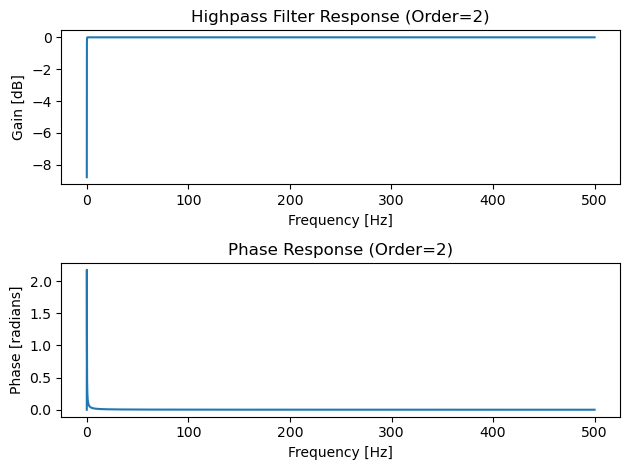

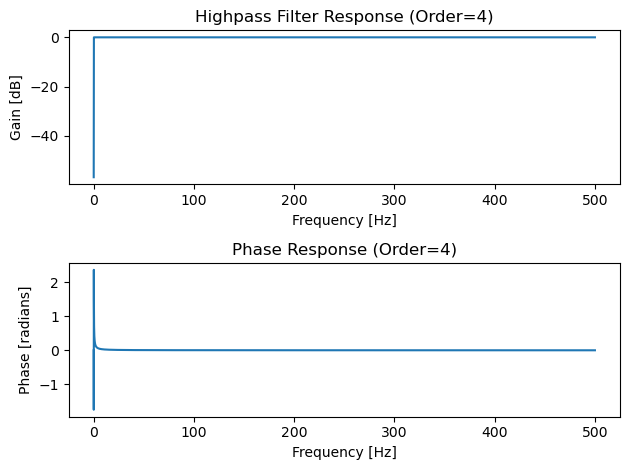

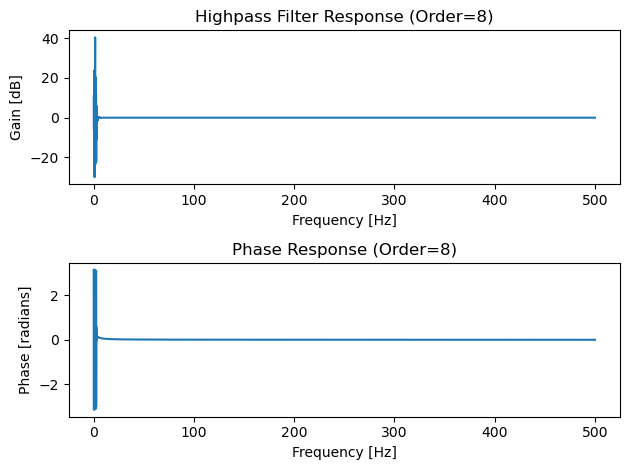

In [15]:
cutoff_highpass = 0.1
for order in [2, 4, 8]:
    plot_filter_response(order, cutoff_highpass, 'highpass', sampling_frequency)

## Highpass filter, cutoff = 1 Hz

C:\Users\Akhil\AppData\Local\Temp\ipykernel_5776\114759088.py:24: RuntimeWarning: divide by zero encountered in log10
  plt.plot(0.5 * sampling_frequency * w / np.pi, 20 * np.log10(abs(h)))


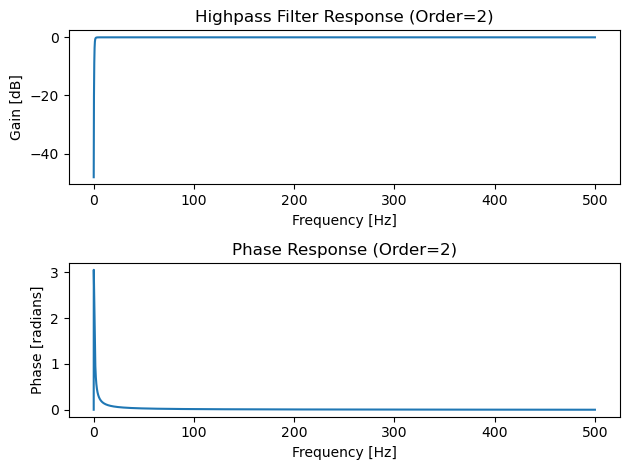

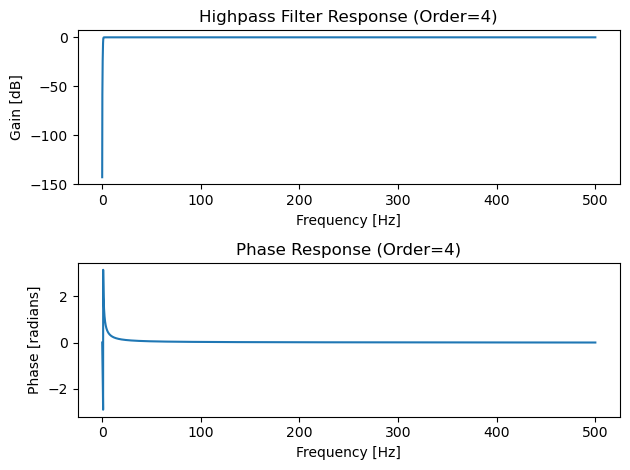

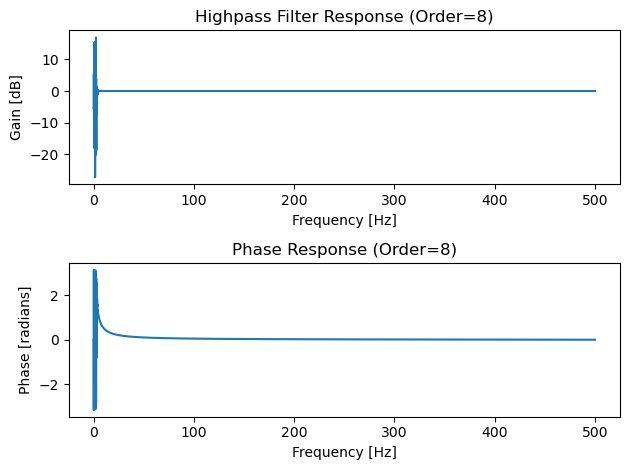

In [19]:
cutoff_highpass = 1
for order in [2, 4, 8]:
    plot_filter_response(order, cutoff_highpass, 'highpass', sampling_frequency)

## Bandpass filter, cutoff = 0.1 to 100Hz

C:\Users\Akhil\AppData\Local\Temp\ipykernel_5776\114759088.py:24: RuntimeWarning: divide by zero encountered in log10
  plt.plot(0.5 * sampling_frequency * w / np.pi, 20 * np.log10(abs(h)))


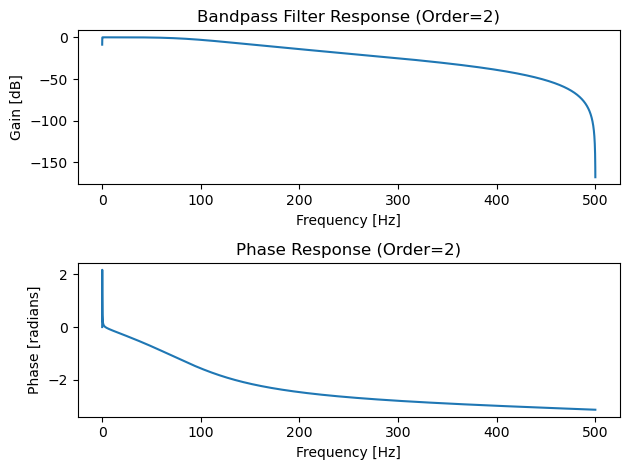

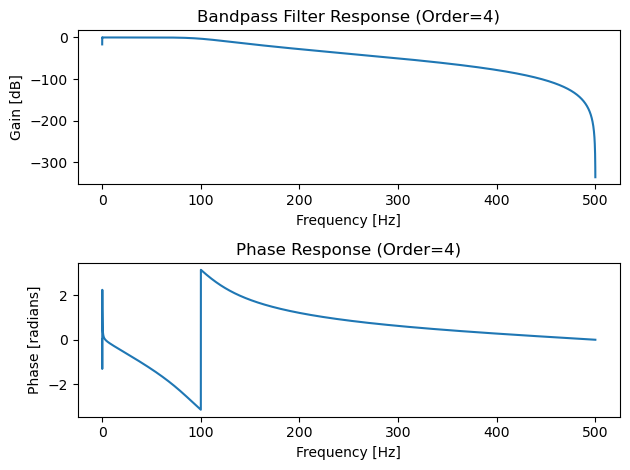

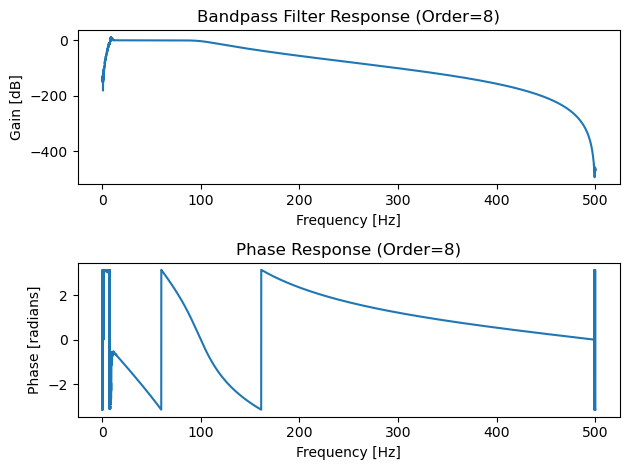

In [16]:
# Bandpass filter
cutoff_bandpass = [0.1, 100.0]
for order in [2, 4, 8]:
    plot_filter_response(order, cutoff_bandpass, 'bandpass', sampling_frequency)

## Bandpass filter, cutoff = 1 to 100 Hz

C:\Users\Akhil\AppData\Local\Temp\ipykernel_5776\114759088.py:24: RuntimeWarning: divide by zero encountered in log10
  plt.plot(0.5 * sampling_frequency * w / np.pi, 20 * np.log10(abs(h)))


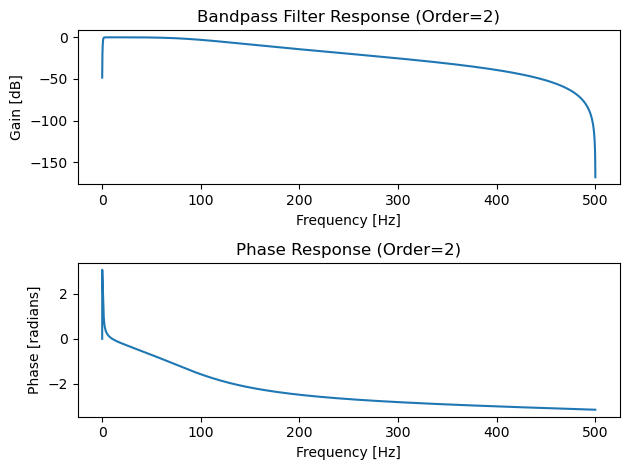

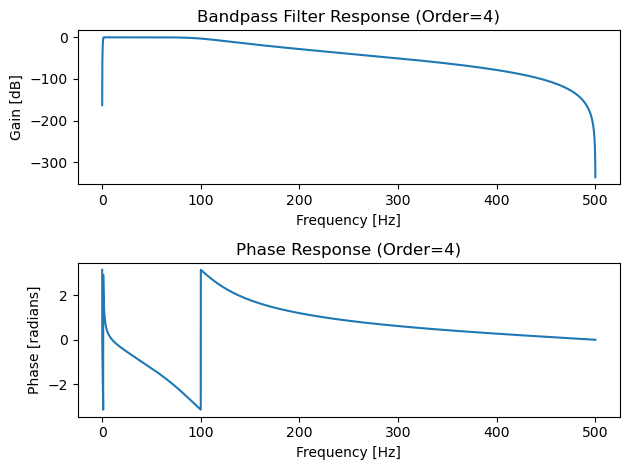

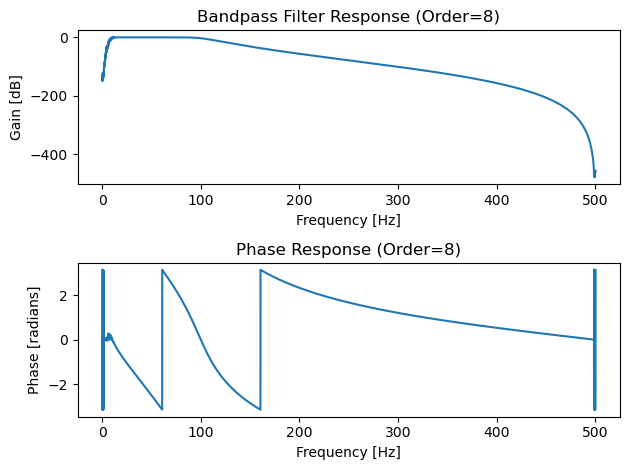

In [18]:
# Bandpass filter
cutoff_bandpass = [1, 100.0]
for order in [2, 4, 8]:
    plot_filter_response(order, cutoff_bandpass, 'bandpass', sampling_frequency)

## Bandstop filter, cutoff = 45 to 55 Hz

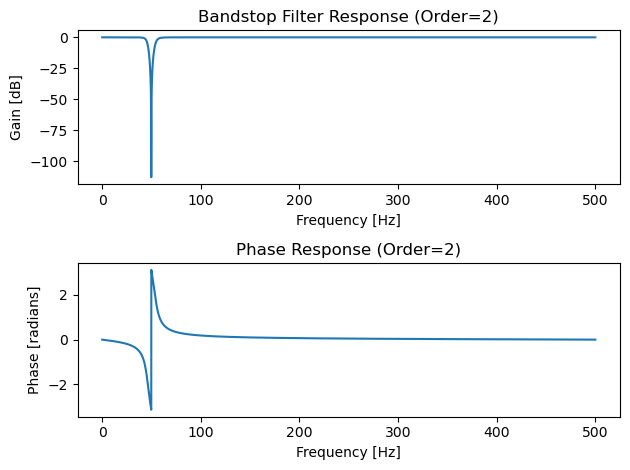

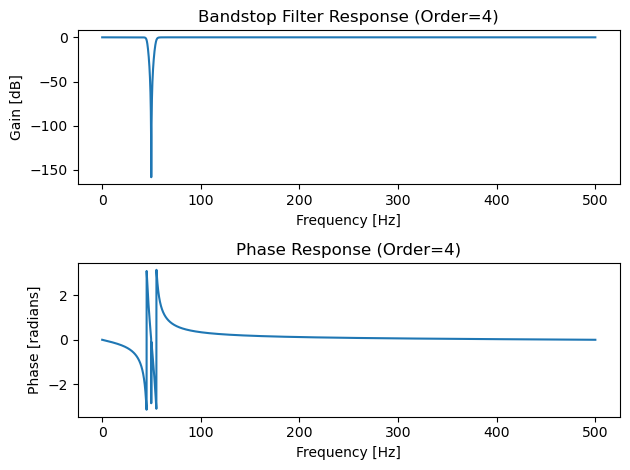

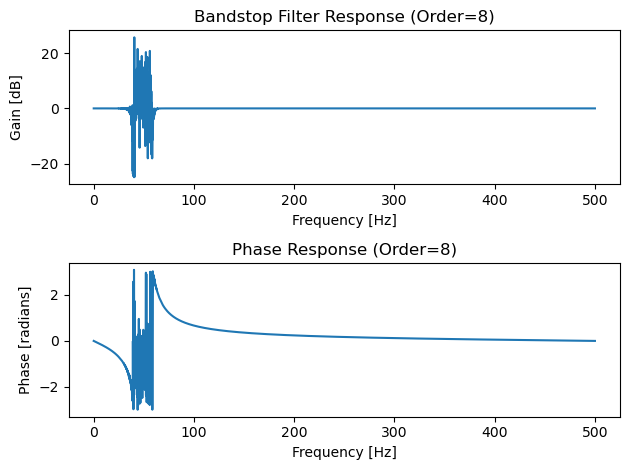

In [17]:
# Bandstop filter
cutoff_bandstop = [45.0, 55.0]
for order in [2, 4, 8]:
    plot_filter_response(order, cutoff_bandstop, 'bandstop', sampling_frequency)

- It is important to design a filter that has a linear phase response in the pass band as linear phase systems preserve the time domain characteristics (shape) of the signals that are not attenuated by the filter.
- As the order of filter increases, it can be inferred that the phase undergoes changes in sign from positive to negative periodically. In a period (when phase doesn't change in sign), the phase response is linear.

## Phase responses

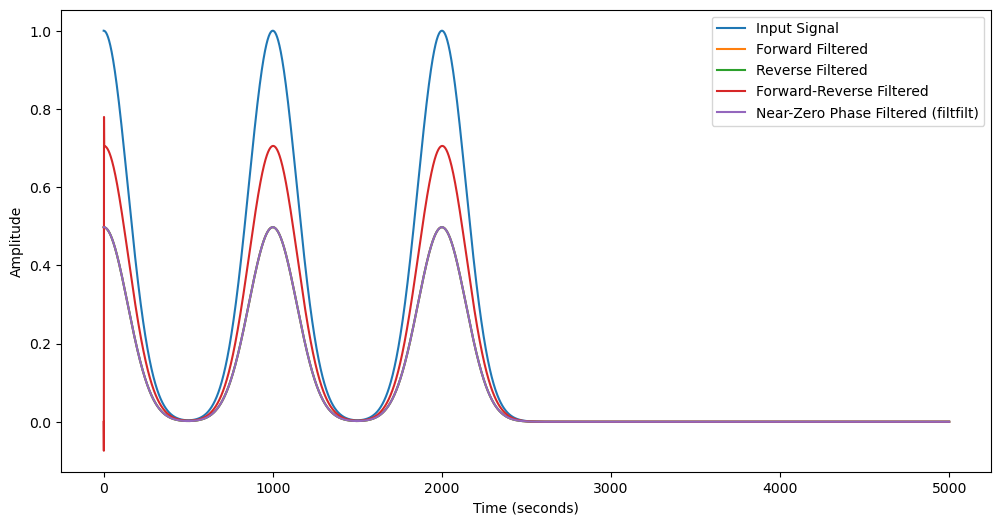

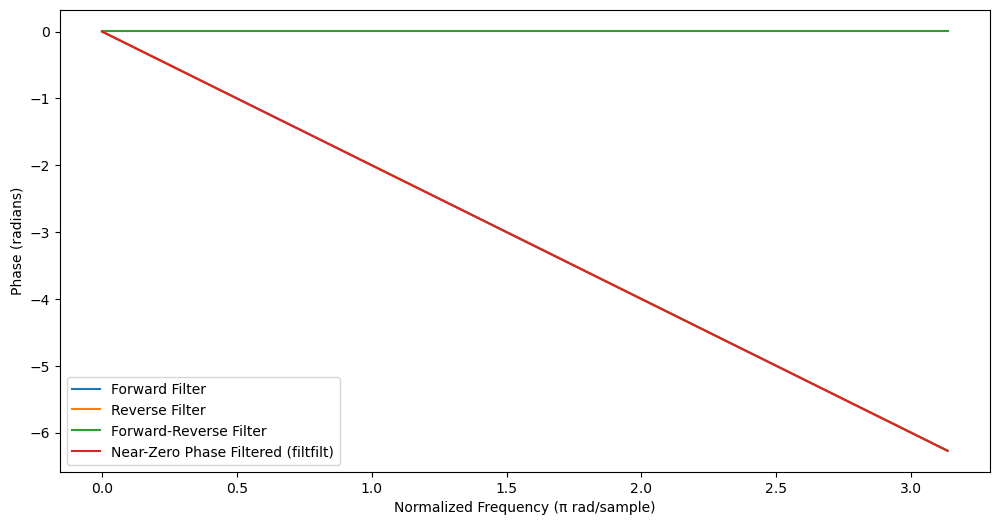

In [48]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# 1. Generate Gaussian signal train
def gaussian_train(duration, std, center_distance, n_pulses):
    t = np.linspace(0, duration, int(duration * 1000), endpoint=False)
    pulses = np.zeros_like(t)
    for i in range(n_pulses):
        pulses += np.exp(-((t - i * center_distance) / std) ** 2)
    return pulses

# Parameters for Gaussian signal
duration = 5  # seconds
std = 0.2  # seconds
center_distance = 1  # seconds
n_pulses = 3

# 2. Create filter coefficients
filter_order = 5  # Adjust as needed
b = signal.firwin(filter_order, 0.2, window=('kaiser', 8), pass_zero=False)

# 3. Apply forward, reverse, and forward-reverse filtering
sig = gaussian_train(duration, std, center_distance, n_pulses)
filtered_forward = signal.filtfilt(b, 1, sig)
filtered_reverse = signal.filtfilt(b, 1, sig[::-1])[::-1]
filtered_forward_reverse = signal.lfilter(b, 1, sig)

# 4. Zero-phase filtering using filtfilt (approximate)
filtered_zero_phase = signal.filtfilt(b, 1, sig)

# 5. Plot the responses with labeled axes
plt.figure(figsize=(12, 6))
plt.plot(sig, label='Input Signal')
plt.plot(filtered_forward, label='Forward Filtered')
plt.plot(filtered_reverse, label='Reverse Filtered')
plt.plot(filtered_forward_reverse, label='Forward-Reverse Filtered')
plt.plot(filtered_zero_phase, label='Near-Zero Phase Filtered (filtfilt)')
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

# 6. Calculate and plot phase responses (corrected forward-reverse)
w, h_forward = signal.freqz(b, 1)
w, h_reverse = signal.freqz(b[::-1], 1)
w, h_forward_reverse = signal.freqz(b, 1)
h_forward_reverse = h_forward_reverse * h_forward_reverse[::-1]  # Corrected calculation
w, h_zero_phase = signal.freqz(b, 1)  # Same as forward for filtfilt

plt.figure(figsize=(12, 6))
plt.plot(w, np.unwrap(np.angle(h_forward)), label='Forward Filter')
plt.plot(w, np.unwrap(np.angle(h_reverse)), label='Reverse Filter')
plt.plot(w, np.unwrap(np.angle(h_forward_reverse)), label='Forward-Reverse Filter')
plt.plot(w, np.unwrap(np.angle(h_zero_phase)), label='Near-Zero Phase Filtered (filtfilt)')  # Corrected label
plt.xlabel('Normalized Frequency (π rad/sample)')
plt.ylabel('Phase (radians)')
plt.legend()
plt.show()

Time-Domain Responses:

- Input Signal: Shows the original Gaussian signal train with three pulses.
- Forward Filtered: Introduces a delay but preserves the overall shape of the signal.
- Reverse Filtered: Inverts the signal and introduces a leading delay.
- Forward-Reverse Filtered: Distorts the signal more than forward filtering due to double filtering.
- Near-Zero Phase Filtered (filtfilt): Appears similar to the input signal with minimal distortion, but may still have slight phase deviations.

  
Frequency-Domain Responses (Phase Plots):

- Forward Filter: Has a linear phase response, indicating a constant delay across frequencies.
- Reverse Filter: Has a mirrored phase response with a leading delay compared to the forward filter.
- Forward-Reverse Filter: Doubles the phase response of the forward filter, amplifying phase distortion.
- Near-Zero Phase Filtered (filtfilt): Approaches a flat phase response, minimizing phase distortion but not eliminating it completely.

# Coherence

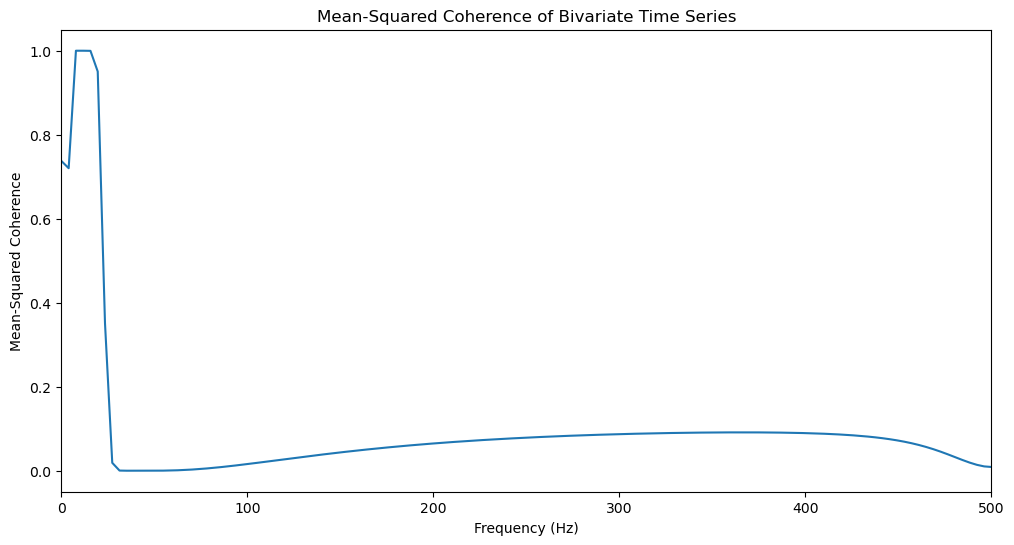

In [47]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# 1. Generate bivariate time series with common frequencies
fs = 1000  # Sampling frequency
t = np.arange(0, 5, 1/fs)  # Time vector
freq1 = 10  # Frequency 1
freq2 = 40  # Frequency 2

# Create sine waves with different amplitudes and phases
sig1 = 0.8 * np.sin(2 * np.pi * freq1 * t + 0.2)
sig2 = 1.5 * np.sin(2 * np.pi * freq2 * t - 0.5) + 0.4 * np.sin(2 * np.pi * freq1 * t)

# Combine signals into a bivariate time series
data = np.vstack((sig1, sig2)).T

# 2. Calculate mean-squared coherence
f, Cxy = signal.coherence(data[:, 0], data[:, 1], fs=fs)

# 3. Plot the coherence
plt.figure(figsize=(12, 6))
plt.plot(f, Cxy)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mean-Squared Coherence')
plt.xlim([0, fs/2])  # Set x-axis limits to Nyquist frequency
plt.title('Mean-Squared Coherence of Bivariate Time Series')
plt.show()


- Overlapping Spectra: The coherence plot will exhibit peaks at frequencies where the signals have significant common content. In this case, you'll observe a strong peak at 10 Hz, confirming the overlapping spectrum at that frequency.- 
Strength of Coherence: The height of the peaks indicates the degree of linear correlation between the signals at those frequencies. Higher coherence values (closer to 1) suggest stronger linear relationships.